# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from dtreeviz import model

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [2]:
# importando o dataset
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# escrevendo os tipos de dados do df
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [4]:
# contando os registros no df
df.count()

longitude             20640
latitude              20640
housing_median_age    20640
total_rooms           20640
total_bedrooms        20433
population            20640
households            20640
median_income         20640
median_house_value    20640
ocean_proximity       20640
dtype: int64

In [5]:
# dropando dupllicados
df = df.drop_duplicates()

In [6]:
# dropando nans
df = df.dropna().reset_index()

In [7]:
# contando os registros no df
df.count()

index                 20433
longitude             20433
latitude              20433
housing_median_age    20433
total_rooms           20433
total_bedrooms        20433
population            20433
households            20433
median_income         20433
median_house_value    20433
ocean_proximity       20433
dtype: int64

In [8]:
# dropando a coluna index
df = df.drop(columns = ['index'])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


Estudando a variável ``housing_median_age`` que parece explicar melhor que as demais o ``median_house_value``.

Convertendo as variáveis categóricas para dummie    

In [29]:
# Converte variáveis categóricas em variáveis dummy, removendo a primeira categoria para evitar multicolinearidade
X = pd.get_dummies(df, drop_first = True)

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

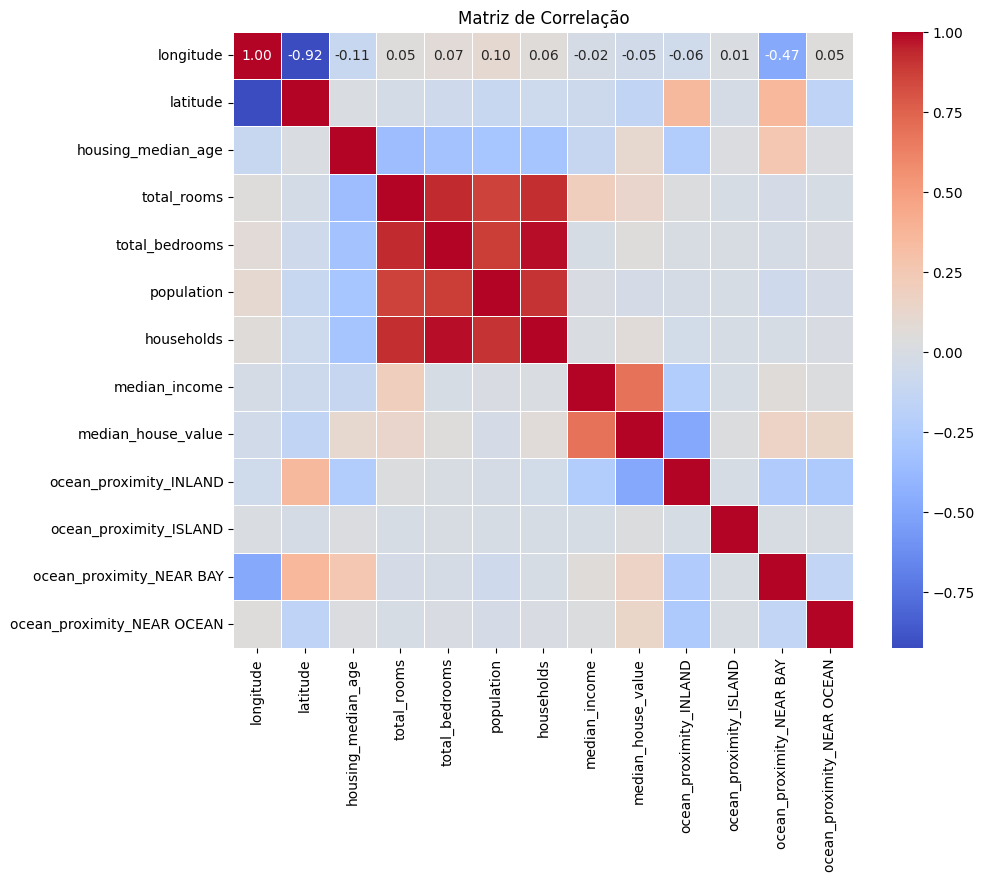

In [30]:
# Calcula a matriz de correlação entre as variáveis numéricas do dataframe
correlation_matrix = X.corr()

# Configura o tamanho da figura
plt.figure(figsize=(10, 8))

# Visualiza a matriz de correlação usando um heatmap
# annot=True exibe os valores de correlação em cada célula
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Define o título do gráfico
plt.title('Matriz de Correlação')

# Exibe o gráfico
plt.show()

In [31]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20433 entries, 0 to 20432
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  float64
 3   total_rooms                 20433 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  float64
 6   households                  20433 non-null  float64
 7   median_income               20433 non-null  float64
 8   median_house_value          20433 non-null  float64
 9   ocean_proximity_INLAND      20433 non-null  bool   
 10  ocean_proximity_ISLAND      20433 non-null  bool   
 11  ocean_proximity_NEAR BAY    20433 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20433 non-null  bool   
dtypes: bool(4), float64(9)
memory u

## as variáveis com correlação positiva:

* ``total_rooms``: Uma correlação positiva forte sugere que casas com mais cômodos tendem a ter valores mais altos.

* ``total_bedrooms``: Similarmente, casas com mais quartos podem ter valores mais elevados.

* ``population``: Uma população maior pode indicar uma demanda mais alta por imóveis, levando a preços mais altos.

* ``households``: O número de domicílios pode também estar relacionado à demanda por imóveis.

* ``median_income``: Uma correlação positiva forte indica que áreas com renda média mais alta geralmente têm valores de casas mais altos.

### 3. Separe os dados em validação e teste

In [32]:
# Seleciona a coluna 'tip' do DataFrame 'tips' como a variável dependente 'y'
y =  X.loc[:,'median_house_value']

y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [33]:
# Divide o conjunto de dados em conjuntos de treinamento e teste
# 'X' e 'y' são as variáveis independentes e dependentes, respectivamente
# 'random_state' é definido para garantir a reprodutibilidade dos resultados

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [24]:
# Cria dois modelos de regressão de árvore de decisão com diferentes profundidades máximas
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

# Ajusta os modelos aos dados de treinamento
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [35]:
from sklearn.metrics import mean_squared_error

# Calcula o MSE para os dois modelos usando os dados de teste
mse1 = mean_squared_error(y_train, regr_1.predict(X_train))
mse2 = mean_squared_error(y_train, regr_2.predict(X_train))

# Exibe o MSE para cada modelo
template = "O MSE da árvore com profundidade={0} é: {1:.2f}"
print(template.format(regr_1.get_depth(), mse1).replace(".", ","))
print(template.format(regr_2.get_depth(), mse2).replace(".", ","))


O MSE da árvore com profundidade=2 é: 1039711682,01
O MSE da árvore com profundidade=8 é: 264289,93


In [36]:
# Calcula o R² (coeficiente de determinação) para os modelos ajustados usando o conjunto de treinamento
# mse1 = mean_squared_error(y_test, regr_1.predict(X_test))
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O R² da árvore com profundidade={0} é: {1:.2f}"

# Exibe o R² para cada modelo, substituindo pontos por vírgulas na formatação
print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))


O R² da árvore com profundidade=2 é: 0,92
O R² da árvore com profundidade=8 é: 1,00


* Profundidade 8: MSE = 264.289,93

Aqui, com uma profundidade maior, o erro caiu drasticamente. Isso sugere que o modelo está agora capturando melhor as variações nos dados, fazendo previsões com muito menos erro. Esse comportamento é esperado, já que uma árvore mais profunda tem mais capacidade de ajustar os dados.

### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

* Árvore com profundidade 2:

    * Tem um MSE mais alto, mas pode ser menos propensa a overfitting.

    * Se o objetivo for ter um modelo que generaliza melhor e que não está ajustado demais aos dados de treino, esta pode ser a escolha mais segura.

* Árvore com profundidade 8:

    * Embora tenha um MSE muito menor e um R² perfeito no treino, é provável que ela não se saia tão bem em dados novos (teste ou 
    validação), justamente por estar overfitted.
    
    * Se nos dados de teste o desempenho cair drasticamente, essa árvore não seria a melhor escolha.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

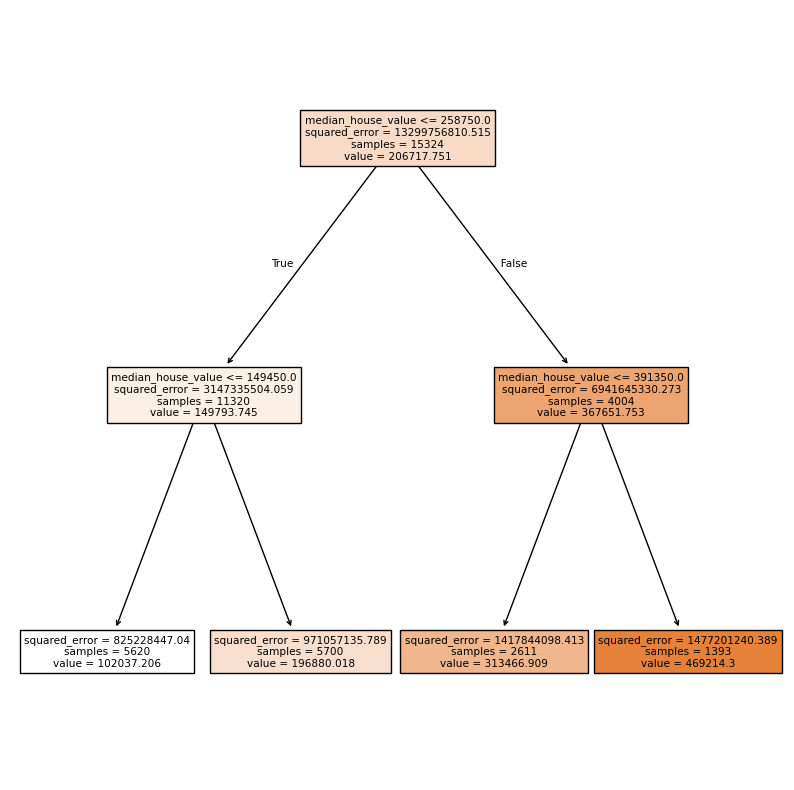

In [41]:
plt.rc('figure', figsize=(10, 10))

# Plota a árvore de decisão ajustada no modelo 'regr_1'
# 'feature_names' especifica os nomes das características para etiquetar os nós
# 'filled=True' preenche os nós com cores para representar as classes ou valores de previsão
tp = tree.plot_tree(regr_1, 
                    feature_names=X.columns,  
                    filled=True) 